<a href="https://colab.research.google.com/github/chiyeon01/Hands_On_Machine_Learning/blob/main/9.%20%EB%B9%84%EC%A7%80%EB%8F%84_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 군집

## K-평균

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

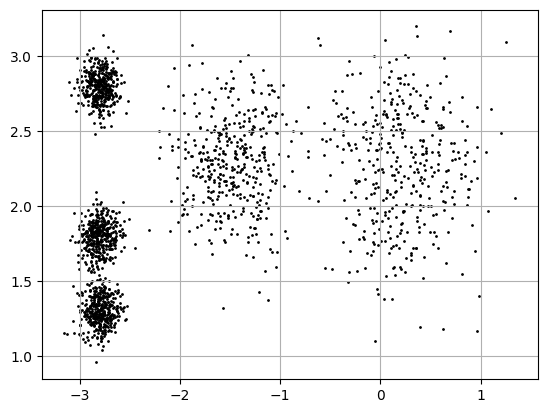

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], s=1, c="k")
plt.grid(True)
plt.show()

In [ ]:
y_pred

array([0, 0, 4, ..., 3, 1, 0], dtype=int32)

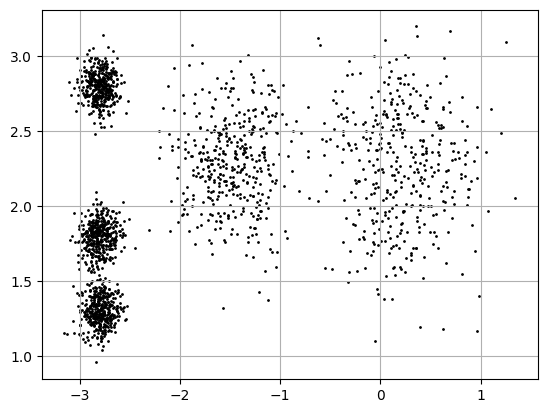

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=1, c="k")
plt.grid(True)
plt.show()

In [ ]:
y_pred is kmeans.labels_

True

In [ ]:
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([4, 4, 3, 3], dtype=int32)

In [ ]:
kmeans.transform(X_new).round(2)

array([[2.84, 0.59, 1.5 , 2.9 , 0.31],
       [5.82, 2.97, 4.48, 5.85, 2.69],
       [1.46, 3.11, 1.69, 0.29, 3.47],
       [0.97, 3.09, 1.55, 0.36, 3.36]])

#### 센트로이드 초기화 방법

In [ ]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

In [ ]:
kmeans.inertia_

211.59853725816828

In [ ]:
kmeans.score(X)

-211.59853725816828

#### K-평균 속도 개선과 미니배치 K-평균

In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

#### 최적의 클러스터 개수 찾기

In [ ]:
from sklearn.metrics import silhouette_score

# 실루엣 점수
silhouette_score(X, kmeans.labels_).item()

0.655517642572828

## 군집을 사용한 이미지 분할

In [ ]:
!wget "https://raw.githubusercontent.com/ageron/handson-ml3/refs/heads/main/images/unsupervised_learning/ladybug.png"

--2025-08-02 09:05:12--  https://raw.githubusercontent.com/ageron/handson-ml3/refs/heads/main/images/unsupervised_learning/ladybug.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 574025 (561K) [image/png]
Saving to: ‘ladybug.png.1’

ladybug.png.1       100%[===================>] 560.57K  --.-KB/s    in 0.05s   

2025-08-02 09:05:13 (11.0 MB/s) - ‘ladybug.png.1’ saved [574025/574025]



In [ ]:
import cv2

image = cv2.cvtColor(cv2.imread("/content/ladybug.png"), cv2.COLOR_BGR2RGB)
image.shape

(533, 800, 3)

In [ ]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

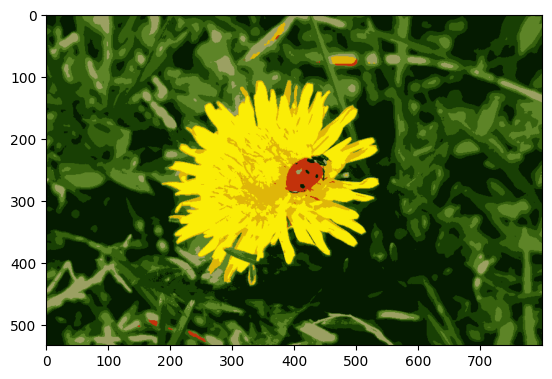

In [ ]:
plt.imshow(segmented_img.astype('int'))

In [ ]:
segmented_img.shape

(533, 800, 3)

## 군집을 사용한 준지도 학습

In [ ]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [ ]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.score(X_test, y_test)

0.7581863979848866

In [ ]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [ ]:
y_representative_digits = y_train[representative_digit_idx]
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8337531486146096

In [ ]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8690176322418136

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [ ]:
dbscan.labels_

array([ 0,  1,  1, -1,  1,  0, -1,  2,  3,  1,  0,  2,  0,  4,  1,  5,  7,
        1,  6,  5,  4,  6,  2,  1,  6, 10,  3,  1,  4,  6,  1,  1,  2,  8,
        4,  1,  2,  4, -1, -1,  2,  8,  7,  4, -1,  8,  1,  2, -1,  6,  1,
        1, 10, -1,  2,  4,  5,  6,  6,  4,  5,  4,  8,  0,  2,  8,  9,  9,
        4,  0,  1,  2,  1,  5,  6,  3,  4,  8,  0,  6,  5, -1,  6,  0,  1,
        1,  5,  1,  1,  1,  7,  8,  1,  2,  6,  3,  7,  1,  6,  4,  1, -1,
       10,  6,  1,  0,  3,  8, -1,  0,  6,  2,  3,  8,  2,  6,  1,  2,  4,
       -1,  1,  6,  0,  0,  2,  6,  8,  8,  1, 11,  1,  4, 10, 10, -1,  2,
       -1,  6,  2,  6,  6,  6, 10,  6,  2,  2,  1,  0,  1,  1,  6, 10,  6,
        0,  9, -1,  6,  1,  6, -1,  1,  0, -1, -1, 10,  1,  1,  6,  4,  1,
        2,  2,  6, -1,  0,  2,  2,  2,  7, -1,  4,  7,  1,  0,  4,  2,  1,
        3, -1,  8,  2,  2,  3,  1, -1,  8,  1,  1,  1,  8,  1,  1,  2,  7,
        2,  1,  3,  3,  1,  1,  0,  7, -1,  2,  6,  6,  1,  1, -1,  8,  2,
        1,  8, -1,  0,  9

In [ ]:
len(dbscan.core_sample_indices_)

796

In [ ]:
dbscan.core_sample_indices_

array([  0,   1,   4,   5,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        17,  18,  20,  21,  22,  23,  24,  26,  27,  28,  29,  30,  31,
        32,  34,  35,  36,  37,  40,  42,  43,  45,  46,  49,  50,  51,
        54,  55,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  71,  72,  73,  75,  77,  78,  79,  80,  82,  83,  84,  86,
        87,  88,  89,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       102, 104, 105, 106, 107, 110, 111, 112, 113, 116, 118, 121, 122,
       123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 135, 137, 138,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153,
       156, 157, 160, 161, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       174, 175, 177, 178, 180, 181, 182, 183, 184, 185, 186, 189, 190,
       191, 192, 193, 195, 196, 197, 198, 199, 200, 201, 202, 205, 206,
       208, 209, 211, 213, 214, 215, 216, 217, 219, 220, 222, 224, 225,
       227, 228, 229, 230, 232, 233, 235, 236, 238, 239, 240, 24

In [ ]:
dbscan.components_

array([[ 0.07961345,  0.27653963],
       [ 1.89967118,  0.05051444],
       [ 1.67002828, -0.22735505],
       ...,
       [ 0.42816761, -0.28061322],
       [ 0.1649262 , -0.06760638],
       [ 1.11276725, -0.49948968]])

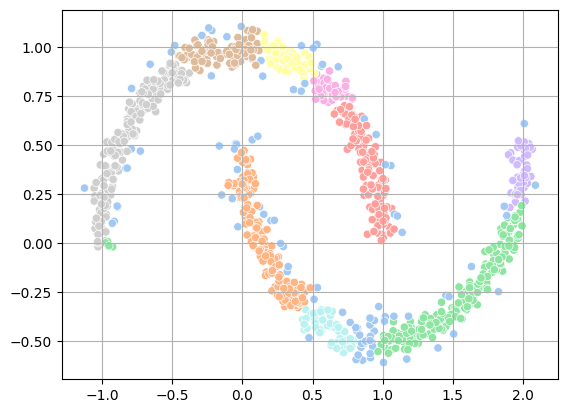

In [ ]:
import seaborn as sns

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=dbscan.labels_, legend=False, palette="pastel")
plt.grid(True)
plt.show()

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.2)

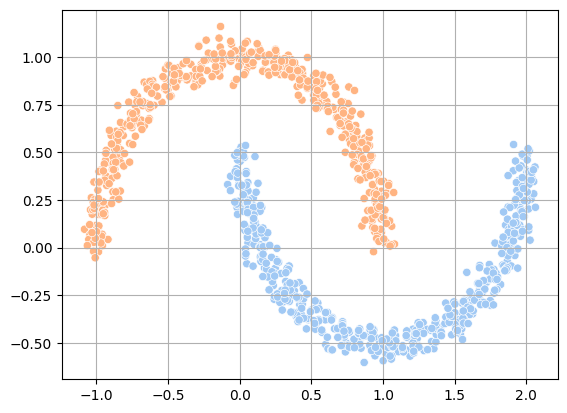

In [ ]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=dbscan.labels_, legend=False, palette="pastel")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [ ]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [ ]:
knn.predict_proba(X_new)

array([[0.22, 0.78],
       [1.  , 0.  ],
       [0.16, 0.84],
       [1.  , 0.  ]])

In [ ]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

# 가우스 혼합

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [ ]:
gm.weights_

array([0.61863215, 0.1879543 , 0.19341356])

In [ ]:
gm.means_

array([[ 0.48945215,  0.25651992],
       [-0.78502638,  0.52692641],
       [ 1.77533994, -0.04169299]])

In [ ]:
gm.covariances_

array([[[ 0.18867977, -0.12294173],
        [-0.12294173,  0.29570872]],

       [[ 0.03729966,  0.04978774],
        [ 0.04978774,  0.08068218]],

       [[ 0.04380003,  0.0544863 ],
        [ 0.0544863 ,  0.0838207 ]]])

In [ ]:
gm.converged_

True

In [ ]:
gm.n_iter_

21

In [ ]:
gm.predict(X)

array([0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2, 0, 1, 2, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0,
       0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1,
       0, 2, 1, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0,
       2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 1, 2, 1, 1, 0,
       1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2,
       2, 1, 2, 1, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 2,

In [ ]:
gm.predict_proba(X).round(3)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
X_new, y_new = gm.sample(6)

In [ ]:
X_new

array([[ 0.69052513,  0.8633095 ],
       [ 0.50379199,  0.09418848],
       [ 0.16952435,  1.20505736],
       [ 0.79651168,  0.11343574],
       [-0.67288758,  0.6399408 ],
       [-0.72013348,  0.3870496 ]])

In [ ]:
y_new

array([0, 0, 0, 0, 1, 1])

In [ ]:
gm.score_samples(X).round(2)

array([-1.56, -1.82, -1.56, -2.25, -0.53, -1.08, -1.14, -1.51, -0.36,
       -1.45, -0.79, -0.04, -1.48, -1.44, -0.52, -2.26, -2.33, -1.55,
       -0.16, -1.33, -0.33, -1.47, -0.37, -1.46, -2.62, -0.4 , -1.68,
       -1.39, -1.28, -1.63, -1.6 , -1.7 , -1.33, -1.76, -1.49, -1.38,
       -2.26,  0.04, -1.65, -1.73, -1.79, -1.45, -1.32, -0.04, -1.63,
       -2.37,  0.13, -2.38, -1.49, -1.57, -1.89, -0.36,  0.16, -0.05,
       -0.58, -1.54, -1.27, -1.29, -0.77, -0.73, -2.01, -1.52, -1.66,
       -1.82, -1.39, -1.48, -0.38, -0.44, -1.25, -1.6 , -1.62, -1.54,
       -2.07, -1.78, -1.42, -1.26, -1.67, -0.7 , -1.51, -0.86, -1.62,
       -2.21, -0.52, -0.03, -1.55,  0.21, -0.17, -1.81, -1.19, -2.25,
       -1.75, -1.26, -0.21, -1.98, -1.43, -1.91, -1.76, -3.06, -0.17,
       -1.67, -2.06, -1.29, -0.21, -0.41, -1.44, -1.98, -1.43, -1.53,
       -1.11, -1.47, -2.14, -2.21, -1.63, -1.54, -1.37, -1.29, -1.33,
       -1.47,  0.13, -1.86, -1.77, -1.51, -0.83,  0.2 , -0.44, -0.73,
       -1.91, -2.12,

## 가우스 혼합을 이용한 이상치 탐지

In [ ]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 2)
anomalies = X[densities < density_threshold]

## 클러스터 개수 선택

In [ ]:
gm.bic(X).item()

2736.3056202124712

In [ ]:
gm.aic(X).item()

2652.873780469775

## 베이즈 가우스 혼합 모델

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

'''
알고리즘이 자동으로 8개의 클러스터가 필요하다고 감지함.
'''

/usr/local/lib/python3.11/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


array([0.12, 0.13, 0.12, 0.15, 0.15, 0.12, 0.11, 0.  , 0.1 , 0.  ])